En este archivo se va a calcular el periodo de la siguiente función

$|x\rangle|f(x)\rangle$

$|00\rangle|0\rangle$

$|01\rangle|1\rangle$

$|10\rangle|0\rangle$

$|11\rangle|1\rangle$

In [108]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import random
from qiskit.circuit.library import UnitaryGate

In [109]:
def fullSwap(circuit, qubits):
    n = len(qubits) - 1
    for i in range(len(qubits)//2):
        circuit.swap(qubits[i], qubits[n - i])
    return circuit

def qft(circuit, qubitsToTranform):
    for i, q in enumerate(reversed(qubitsToTranform)):
        circuit.h(q)
        for j, cq in enumerate(list(reversed(qubitsToTranform))[i+1:]):
            circuit.cp(np.pi/(2**(j + 1)), cq, q)
        circuit.barrier()
    return fullSwap(circuit, qubitsToTranform)

def invQft(circuit, qubitsToTransform):
    n = len(qubitsToTransform) - 1
    circuit = fullSwap(circuit, qubitsToTransform)
    for i, q in enumerate(qubitsToTransform):
        if i != 0:
            for j, cq in enumerate(reversed(qubitsToTransform[:i])):
                circuit.cp(2*np.pi - np.pi/(2**(j + 1)), cq, q)
        circuit.h(q)
        circuit.barrier()
    return circuit

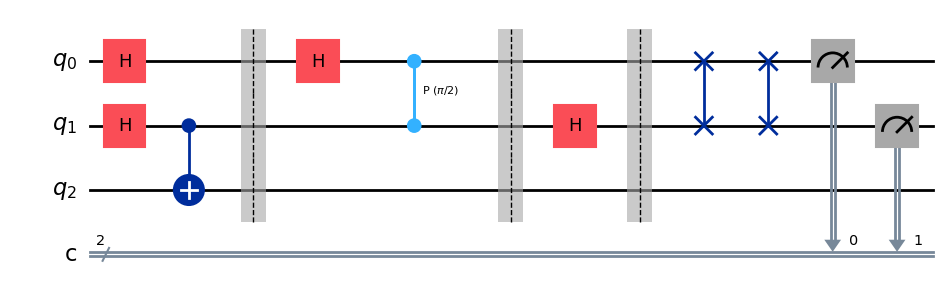

In [110]:
circuit = QuantumCircuit(3, 2)
circuit.h(range(2))
circuit.cx(1, 2)
circuit.barrier()
cirtuit = qft(circuit, range(1, -1, -1))
circuit = fullSwap(circuit, range(2))
circuit.measure(range(2), range(2))
circuit.draw("mpl")

Histograma


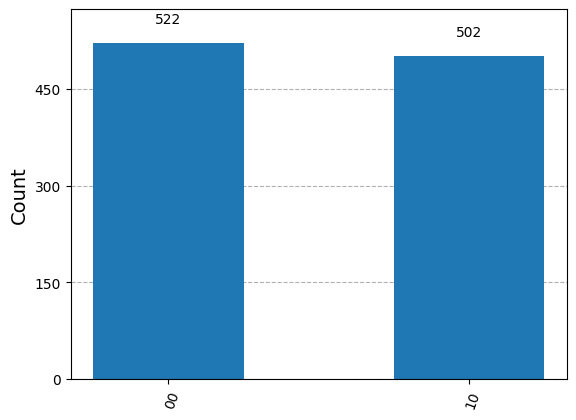

In [111]:
backend = Aer.get_backend('statevector_simulator')
compiled1 = transpile(circuit, backend)
job1 = backend.run(compiled1, shots=1024)
result1 = job1.result()
counts = result1.get_counts()
print("Histograma")
display(plot_histogram(counts))

In [119]:
k = np.gcd.reduce([int(i, 2) for i in counts.keys()])
print(k)
p = 4 / k
print("El periodo es", int(p))

2
El periodo es 2
